# TP 1 : Analyse Exploratoire des Données (EDA)
## Dataset : Wine Quality

**Objectifs du TP :**
1. Charger et explorer les datasets de vin rouge et blanc
2. Comprendre la structure et la qualité des données
3. Visualiser les distributions des variables
4. Analyser les corrélations entre les variables
5. Identifier les patterns et insights importants

**Auteur :** Anita Dongmo  
**Date :** Novembre 2024

## 1. Importation des bibliothèques nécessaires

Nous allons utiliser les principales bibliothèques Python pour l'analyse de données :
- **pandas** : manipulation et analyse de données
- **numpy** : calculs numériques
- **matplotlib & seaborn** : visualisations
- **scipy** : statistiques avancées

In [3]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration des visualisations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuration pour afficher plus de colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Configuration de la taille des graphiques par défaut
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Bibliothèques importées avec succès!")

✓ Bibliothèques importées avec succès!


## 2. Chargement des données

Nous allons charger les deux datasets (vin rouge et vin blanc) depuis le dossier `Datasets`.

In [6]:
# Chargement des datasets
try:
    # Chemins relatifs vers les fichiers
    red_wine = pd.read_csv('../wine+quality/winequality-red.csv', sep=';')
    white_wine = pd.read_csv('../wine+quality/winequality-white.csv', sep=';')
    
    # Ajout d'une colonne pour identifier le type de vin
    red_wine['type'] = 'red'
    white_wine['type'] = 'white'
    
    # Combinaison des deux datasets
    wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
    
    print("✓ Données chargées avec succès!")
    print(f"\n📊 Vin rouge : {len(red_wine)} échantillons")
    print(f"📊 Vin blanc : {len(white_wine)} échantillons")
    print(f"📊 Total : {len(wine_data)} échantillons")
    
except FileNotFoundError as e:
    print(f"❌ Erreur : Fichier non trouvé. Vérifiez le chemin des fichiers.")
    print(f"Détails : {e}")

✓ Données chargées avec succès!

📊 Vin rouge : 1599 échantillons
📊 Vin blanc : 4898 échantillons
📊 Total : 6497 échantillons


## 3. Exploration initiale des données

### 3.1 Aperçu général du dataset

In [7]:
# Affichage des premières lignes
print("=" * 80)
print("APERÇU DES PREMIÈRES LIGNES DU DATASET")
print("=" * 80)
display(wine_data.head(10))

print("\n" + "=" * 80)
print("APERÇU DES DERNIÈRES LIGNES DU DATASET")
print("=" * 80)
display(wine_data.tail(5))

APERÇU DES PREMIÈRES LIGNES DU DATASET


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red



APERÇU DES DERNIÈRES LIGNES DU DATASET


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### 3.2 Informations sur la structure des données

In [8]:
# Informations sur le dataset
print("=" * 80)
print("INFORMATIONS SUR LE DATASET")
print("=" * 80)
print(f"\nDimensions : {wine_data.shape[0]} lignes × {wine_data.shape[1]} colonnes\n")

wine_data.info()

print("\n" + "=" * 80)
print("TYPES DE DONNÉES")
print("=" * 80)
print(wine_data.dtypes)

INFORMATIONS SUR LE DATASET

Dimensions : 6497 lignes × 13 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.

### 3.3 Statistiques descriptives

In [9]:
# Statistiques descriptives complètes
print("=" * 80)
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES")
print("=" * 80)
display(wine_data.describe().T.style.background_gradient(cmap='YlOrRd'))

print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES")
print("=" * 80)
display(wine_data.describe(include=['object']))

STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.000000,7.215307,1.296434,3.800000,6.400000,7.000000,7.700000,15.900000
volatile acidity,6497.000000,0.339666,0.164636,0.080000,0.230000,0.290000,0.400000,1.580000
citric acid,6497.000000,0.318633,0.145318,0.000000,0.250000,0.310000,0.390000,1.660000
residual sugar,6497.000000,5.443235,4.757804,0.600000,1.800000,3.000000,8.100000,65.800000
chlorides,6497.000000,0.056034,0.035034,0.009000,0.038000,0.047000,0.065000,0.611000
free sulfur dioxide,6497.000000,30.525319,17.749400,1.000000,17.000000,29.000000,41.000000,289.000000
total sulfur dioxide,6497.000000,115.744574,56.521855,6.000000,77.000000,118.000000,156.000000,440.000000
density,6497.000000,0.994697,0.002999,0.987110,0.992340,0.994890,0.996990,1.038980
pH,6497.000000,3.218501,0.160787,2.720000,3.110000,3.210000,3.320000,4.010000
sulphates,6497.000000,0.531268,0.148806,0.220000,0.430000,0.510000,0.600000,2.000000



STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES


,type
count,6497
unique,2
top,white
freq,4898


### 3.4 Vérification des valeurs manquantes

In [10]:
# Analyse des valeurs manquantes
print("=" * 80)
print("ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

missing_values = wine_data.isnull().sum()
missing_percent = (missing_values / len(wine_data)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percent.values
})

display(missing_df[missing_df['Valeurs manquantes'] > 0])

if missing_values.sum() == 0:
    print("\n✓ Aucune valeur manquante détectée dans le dataset!")
else:
    print(f"\n⚠ Total de valeurs manquantes : {missing_values.sum()}")

ANALYSE DES VALEURS MANQUANTES


,Colonne,Valeurs manquantes,Pourcentage (%)



✓ Aucune valeur manquante détectée dans le dataset!


### 3.5 Vérification des doublons

In [11]:
# Vérification des doublons
duplicates = wine_data.duplicated().sum()

print("=" * 80)
print("ANALYSE DES DOUBLONS")
print("=" * 80)
print(f"\nNombre de lignes dupliquées : {duplicates}")
print(f"Pourcentage de doublons : {(duplicates/len(wine_data)*100):.2f}%")

if duplicates > 0:
    print("\n⚠ Des doublons ont été détectés. Ils peuvent être supprimés si nécessaire.")
else:
    print("\n✓ Aucun doublon détecté!")

ANALYSE DES DOUBLONS

Nombre de lignes dupliquées : 1177
Pourcentage de doublons : 18.12%

⚠ Des doublons ont été détectés. Ils peuvent être supprimés si nécessaire.


## 4. Analyse de la variable cible : Quality

La variable **quality** est notre variable cible. Elle représente la qualité du vin sur une échelle de 0 à 10.

DISTRIBUTION DE LA VARIABLE 'QUALITY'
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

RÉPARTITION PAR CATÉGORIE DE QUALITÉ


,Quality,Count,Percentage (%)
0,3,30,0.46
1,4,216,3.32
2,5,2138,32.91
3,6,2836,43.65
4,7,1079,16.61
5,8,193,2.97
6,9,5,0.08


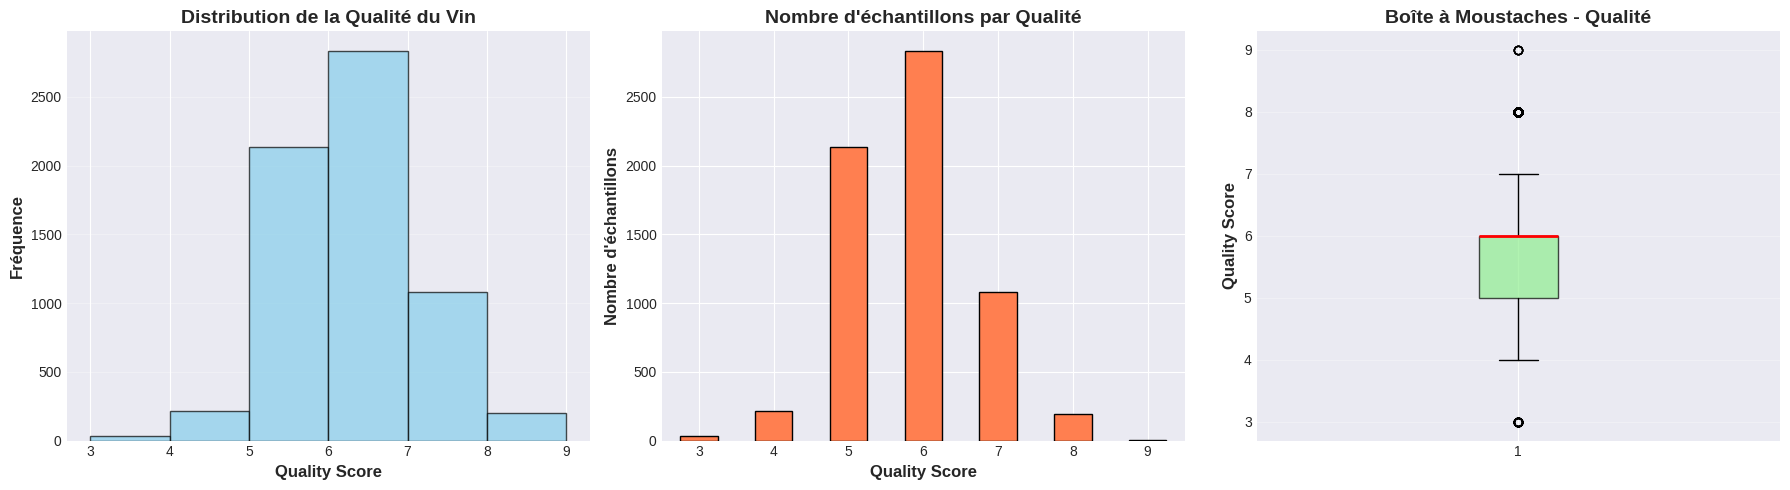


📌 Observations :
  - Qualité moyenne : 5.82
  - Médiane : 6
  - Écart-type : 0.87
  - Min : 3 | Max : 9


In [12]:
# Analyse de la distribution de la qualité
print("=" * 80)
print("DISTRIBUTION DE LA VARIABLE 'QUALITY'")
print("=" * 80)

quality_stats = wine_data['quality'].describe()
print(quality_stats)

print("\n" + "=" * 80)
print("RÉPARTITION PAR CATÉGORIE DE QUALITÉ")
print("=" * 80)

quality_counts = wine_data['quality'].value_counts().sort_index()
quality_percent = (quality_counts / len(wine_data) * 100).round(2)

quality_df = pd.DataFrame({
    'Quality': quality_counts.index,
    'Count': quality_counts.values,
    'Percentage (%)': quality_percent.values
})

display(quality_df)

# Visualisation de la distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogramme
axes[0].hist(wine_data['quality'], bins=np.arange(3, 10, 1), 
             edgecolor='black', color='skyblue', alpha=0.7)
axes[0].set_xlabel('Quality Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution de la Qualité du Vin', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Diagramme en barres
quality_counts.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_xlabel('Quality Score', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[1].set_title('Nombre d\'échantillons par Qualité', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

# Boîte à moustaches
axes[2].boxplot(wine_data['quality'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[2].set_ylabel('Quality Score', fontsize=12, fontweight='bold')
axes[2].set_title('Boîte à Moustaches - Qualité', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📌 Observations :")
print(f"  - Qualité moyenne : {wine_data['quality'].mean():.2f}")
print(f"  - Médiane : {wine_data['quality'].median():.0f}")
print(f"  - Écart-type : {wine_data['quality'].std():.2f}")
print(f"  - Min : {wine_data['quality'].min():.0f} | Max : {wine_data['quality'].max():.0f}")

### 4.1 Comparaison de la qualité entre vins rouges et blancs

COMPARAISON QUALITÉ : VIN ROUGE vs VIN BLANC


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


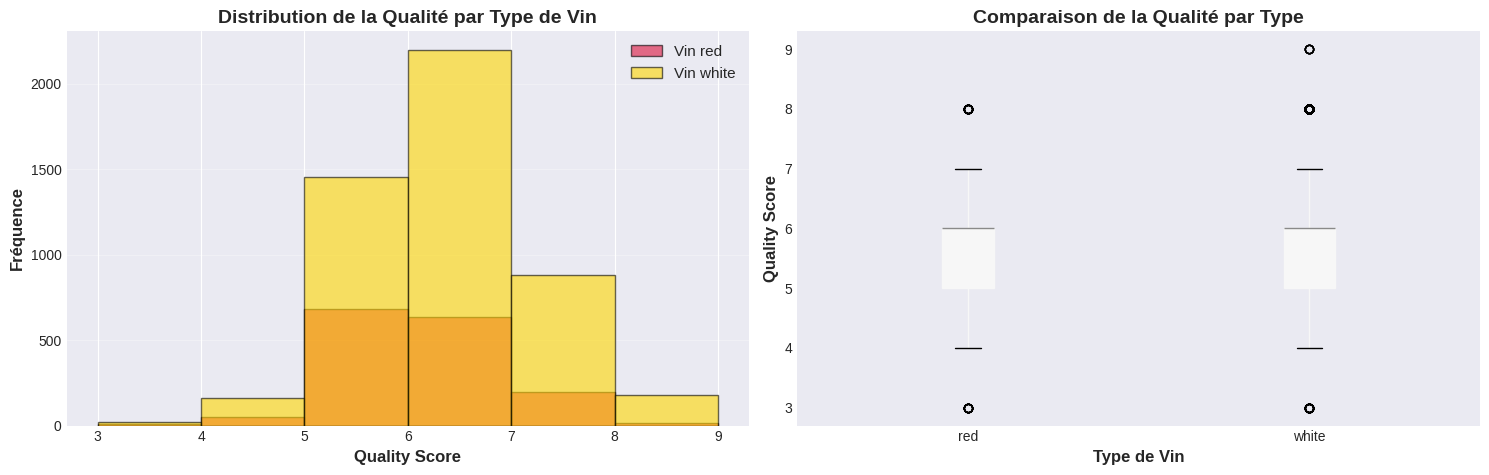


📊 Test t de Student (différence de moyennes) :
  - t-statistique : -9.6856
  - p-value : 0.0000
  ✓ Différence significative entre les deux types de vin (p < 0.05)


In [13]:
# Comparaison rouge vs blanc
print("=" * 80)
print("COMPARAISON QUALITÉ : VIN ROUGE vs VIN BLANC")
print("=" * 80)

comparison = wine_data.groupby('type')['quality'].describe()
display(comparison)

# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution par type
for wine_type, color in zip(['red', 'white'], ['crimson', 'gold']):
    data_subset = wine_data[wine_data['type'] == wine_type]['quality']
    axes[0].hist(data_subset, bins=np.arange(3, 10, 1), 
                 alpha=0.6, label=f'Vin {wine_type}', color=color, edgecolor='black')

axes[0].set_xlabel('Quality Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution de la Qualité par Type de Vin', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot comparatif
wine_data.boxplot(column='quality', by='type', ax=axes[1], 
                  patch_artist=True, grid=False)
axes[1].set_xlabel('Type de Vin', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Quality Score', fontsize=12, fontweight='bold')
axes[1].set_title('Comparaison de la Qualité par Type', fontsize=14, fontweight='bold')
plt.suptitle('')  # Supprimer le titre automatique

plt.tight_layout()
plt.show()

# Test statistique
red_quality = wine_data[wine_data['type'] == 'red']['quality']
white_quality = wine_data[wine_data['type'] == 'white']['quality']

t_stat, p_value = stats.ttest_ind(red_quality, white_quality)

print("\n📊 Test t de Student (différence de moyennes) :")
print(f"  - t-statistique : {t_stat:.4f}")
print(f"  - p-value : {p_value:.4f}")

if p_value < 0.05:
    print("  ✓ Différence significative entre les deux types de vin (p < 0.05)")
else:
    print("  ✗ Pas de différence significative (p ≥ 0.05)")

## 5. Distribution des variables physicochimiques

Analysons maintenant les distributions de toutes les variables physicochimiques.

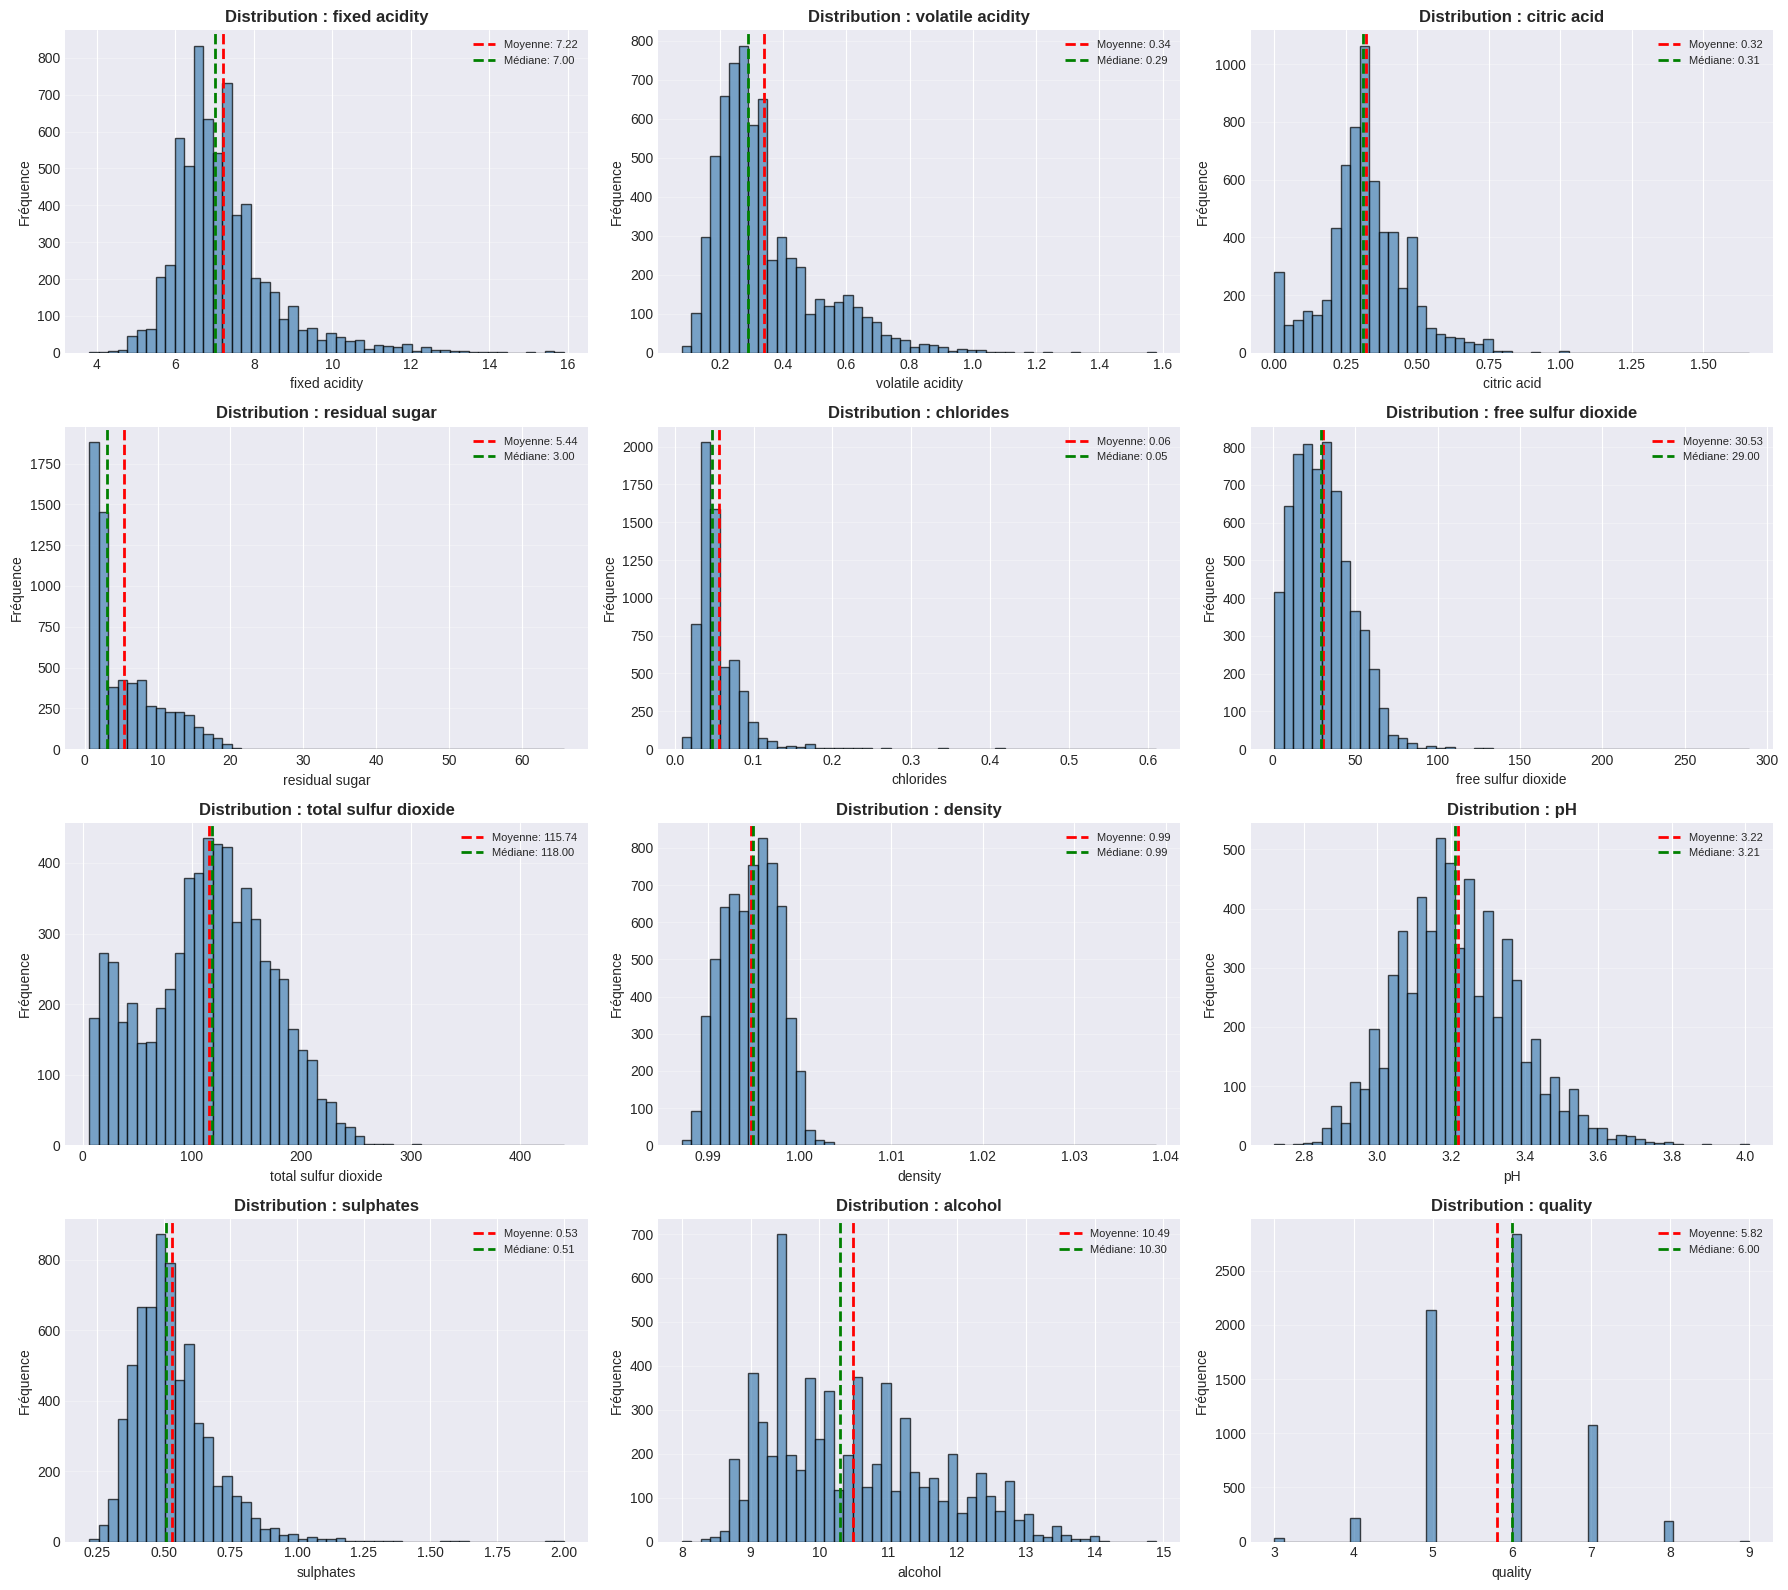

📌 Les distributions permettent d'identifier :
  - Les variables avec des distributions normales ou asymétriques
  - La présence de valeurs extrêmes (outliers)
  - Les échelles de valeurs de chaque variable


In [14]:
# Sélection des colonnes numériques (sans 'type')
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns.tolist()

# Création d'une grille de sous-graphiques
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(wine_data[col], bins=50, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution : {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Fréquence', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajout de statistiques sur le graphique
    mean_val = wine_data[col].mean()
    median_val = wine_data[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Masquer les axes non utilisés
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("📌 Les distributions permettent d'identifier :")
print("  - Les variables avec des distributions normales ou asymétriques")
print("  - La présence de valeurs extrêmes (outliers)")
print("  - Les échelles de valeurs de chaque variable")

### 5.1 Analyse des asymétries (Skewness) et Kurtosis

In [15]:
# Calcul de la skewness et kurtosis
print("=" * 80)
print("ANALYSE DE L'ASYMÉTRIE (SKEWNESS) ET KURTOSIS")
print("=" * 80)

skew_kurt_df = pd.DataFrame({
    'Variable': numeric_cols,
    'Skewness': [wine_data[col].skew() for col in numeric_cols],
    'Kurtosis': [wine_data[col].kurtosis() for col in numeric_cols]
})

skew_kurt_df = skew_kurt_df.sort_values('Skewness', ascending=False)
display(skew_kurt_df.style.background_gradient(cmap='RdYlGn_r', subset=['Skewness', 'Kurtosis']))

print("\n📚 Interprétation :")
print("  • Skewness ~ 0 : distribution symétrique")
print("  • Skewness > 0 : asymétrie à droite (queue à droite)")
print("  • Skewness < 0 : asymétrie à gauche (queue à gauche)")
print("  • |Skewness| > 1 : asymétrie forte")
print("\n  • Kurtosis ~ 0 : distribution normale (mesokurtique)")
print("  • Kurtosis > 0 : distribution avec queues lourdes (leptokurtique)")
print("  • Kurtosis < 0 : distribution avec queues légères (platykurtique)")

ANALYSE DE L'ASYMÉTRIE (SKEWNESS) ET KURTOSIS


,Variable,Skewness,Kurtosis
4,chlorides,5.399828,50.898051
9,sulphates,1.797270,8.653699
0,fixed acidity,1.723290,5.061161
1,volatile acidity,1.495097,2.825372
3,residual sugar,1.435404,4.359272
5,free sulfur dioxide,1.220066,7.906238
10,alcohol,0.565718,-0.531687
7,density,0.503602,6.606067
2,citric acid,0.471731,2.397239
8,pH,0.386839,0.367657



📚 Interprétation :
  • Skewness ~ 0 : distribution symétrique
  • Skewness > 0 : asymétrie à droite (queue à droite)
  • Skewness < 0 : asymétrie à gauche (queue à gauche)
  • |Skewness| > 1 : asymétrie forte

  • Kurtosis ~ 0 : distribution normale (mesokurtique)
  • Kurtosis > 0 : distribution avec queues lourdes (leptokurtique)
  • Kurtosis < 0 : distribution avec queues légères (platykurtique)


## 6. Analyse des corrélations

Les corrélations nous permettent de comprendre les relations entre les variables.

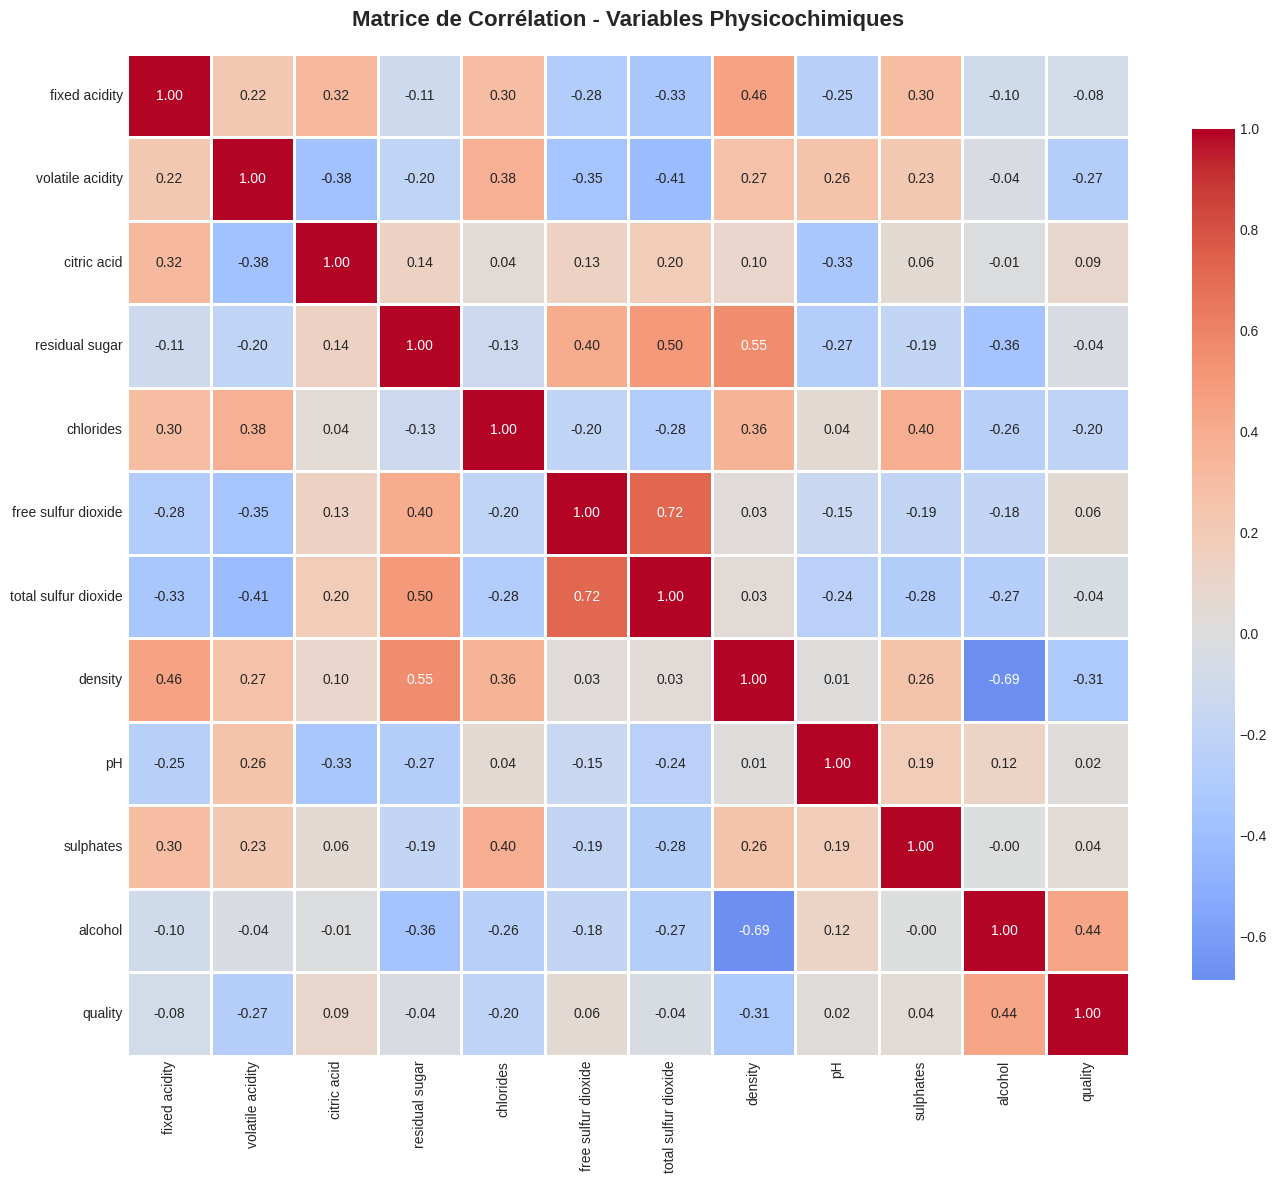

📌 Interprétation des valeurs de corrélation :
  • |r| = 1.00 : corrélation parfaite
  • 0.70 < |r| < 1.00 : corrélation forte
  • 0.40 < |r| < 0.70 : corrélation modérée
  • 0.20 < |r| < 0.40 : corrélation faible
  • |r| < 0.20 : corrélation très faible ou nulle


In [16]:
# Calcul de la matrice de corrélation
correlation_matrix = wine_data[numeric_cols].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Variables Physicochimiques', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("📌 Interprétation des valeurs de corrélation :")
print("  • |r| = 1.00 : corrélation parfaite")
print("  • 0.70 < |r| < 1.00 : corrélation forte")
print("  • 0.40 < |r| < 0.70 : corrélation modérée")
print("  • 0.20 < |r| < 0.40 : corrélation faible")
print("  • |r| < 0.20 : corrélation très faible ou nulle")

### 6.1 Corrélations les plus fortes avec la qualité

CORRÉLATIONS AVEC LA VARIABLE 'QUALITY'


,Variable,Corrélation,Corrélation (abs)
0,quality,1.000000,1.000000
1,alcohol,0.444319,0.444319
2,citric acid,0.085532,0.085532
3,free sulfur dioxide,0.055463,0.055463
4,sulphates,0.038485,0.038485
5,pH,0.019506,0.019506
6,residual sugar,-0.036980,0.036980
7,total sulfur dioxide,-0.041385,0.041385
8,fixed acidity,-0.076743,0.076743
9,chlorides,-0.200666,0.200666


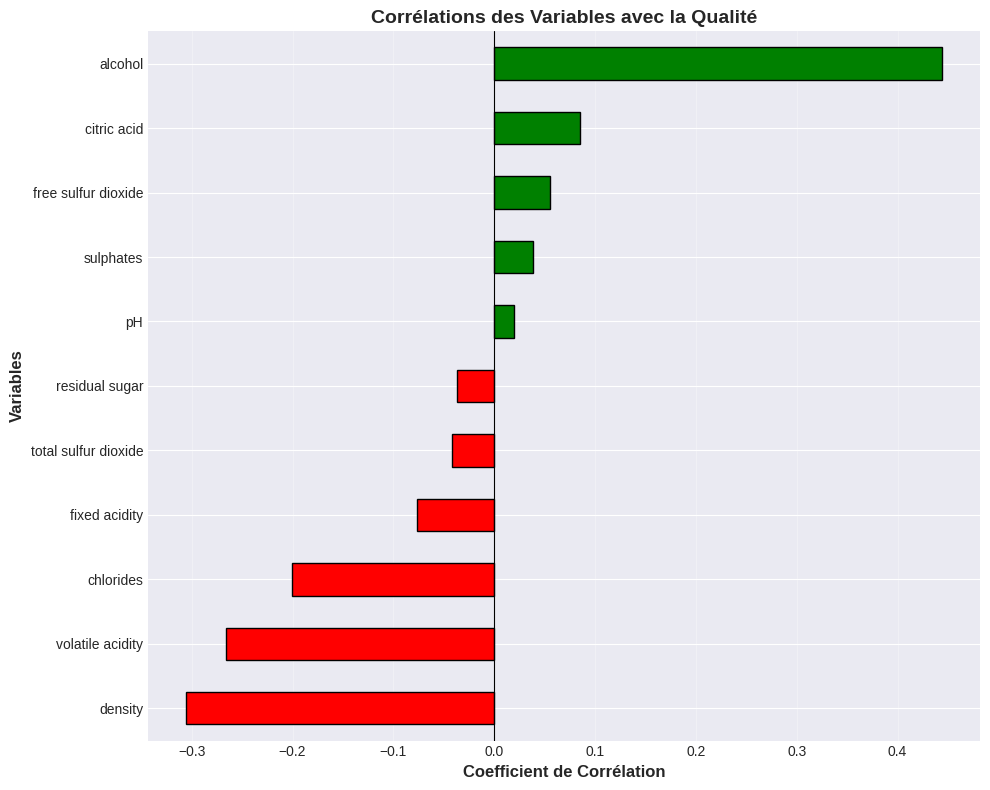


🎯 Top 5 des variables les plus corrélées avec la qualité :
  • alcohol                   : +0.4443 (corrélation positive)
  • density                   : -0.3059 (corrélation négative)
  • volatile acidity          : -0.2657 (corrélation négative)
  • chlorides                 : -0.2007 (corrélation négative)
  • citric acid               : +0.0855 (corrélation positive)


In [17]:
# Extraction des corrélations avec 'quality'
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)

print("=" * 80)
print("CORRÉLATIONS AVEC LA VARIABLE 'QUALITY'")
print("=" * 80)

quality_corr_df = pd.DataFrame({
    'Variable': quality_corr.index,
    'Corrélation': quality_corr.values,
    'Corrélation (abs)': np.abs(quality_corr.values)
})

display(quality_corr_df.style.background_gradient(cmap='RdYlGn', subset=['Corrélation']))

# Visualisation des corrélations avec quality
plt.figure(figsize=(10, 8))
quality_corr_plot = quality_corr.drop('quality').sort_values()

colors = ['red' if x < 0 else 'green' for x in quality_corr_plot.values]
quality_corr_plot.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Corrélations des Variables avec la Qualité', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient de Corrélation', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Identifier les variables les plus corrélées
top_corr = quality_corr.drop('quality').abs().sort_values(ascending=False).head(5)

print("\n🎯 Top 5 des variables les plus corrélées avec la qualité :")
for var, corr_val in top_corr.items():
    direction = "positive" if quality_corr[var] > 0 else "négative"
    print(f"  • {var:25s} : {quality_corr[var]:+.4f} (corrélation {direction})")

### 6.2 Pairplot des variables les plus corrélées


Variables sélectionnées pour le pairplot : ['alcohol', 'density', 'volatile acidity', 'chlorides', 'quality']


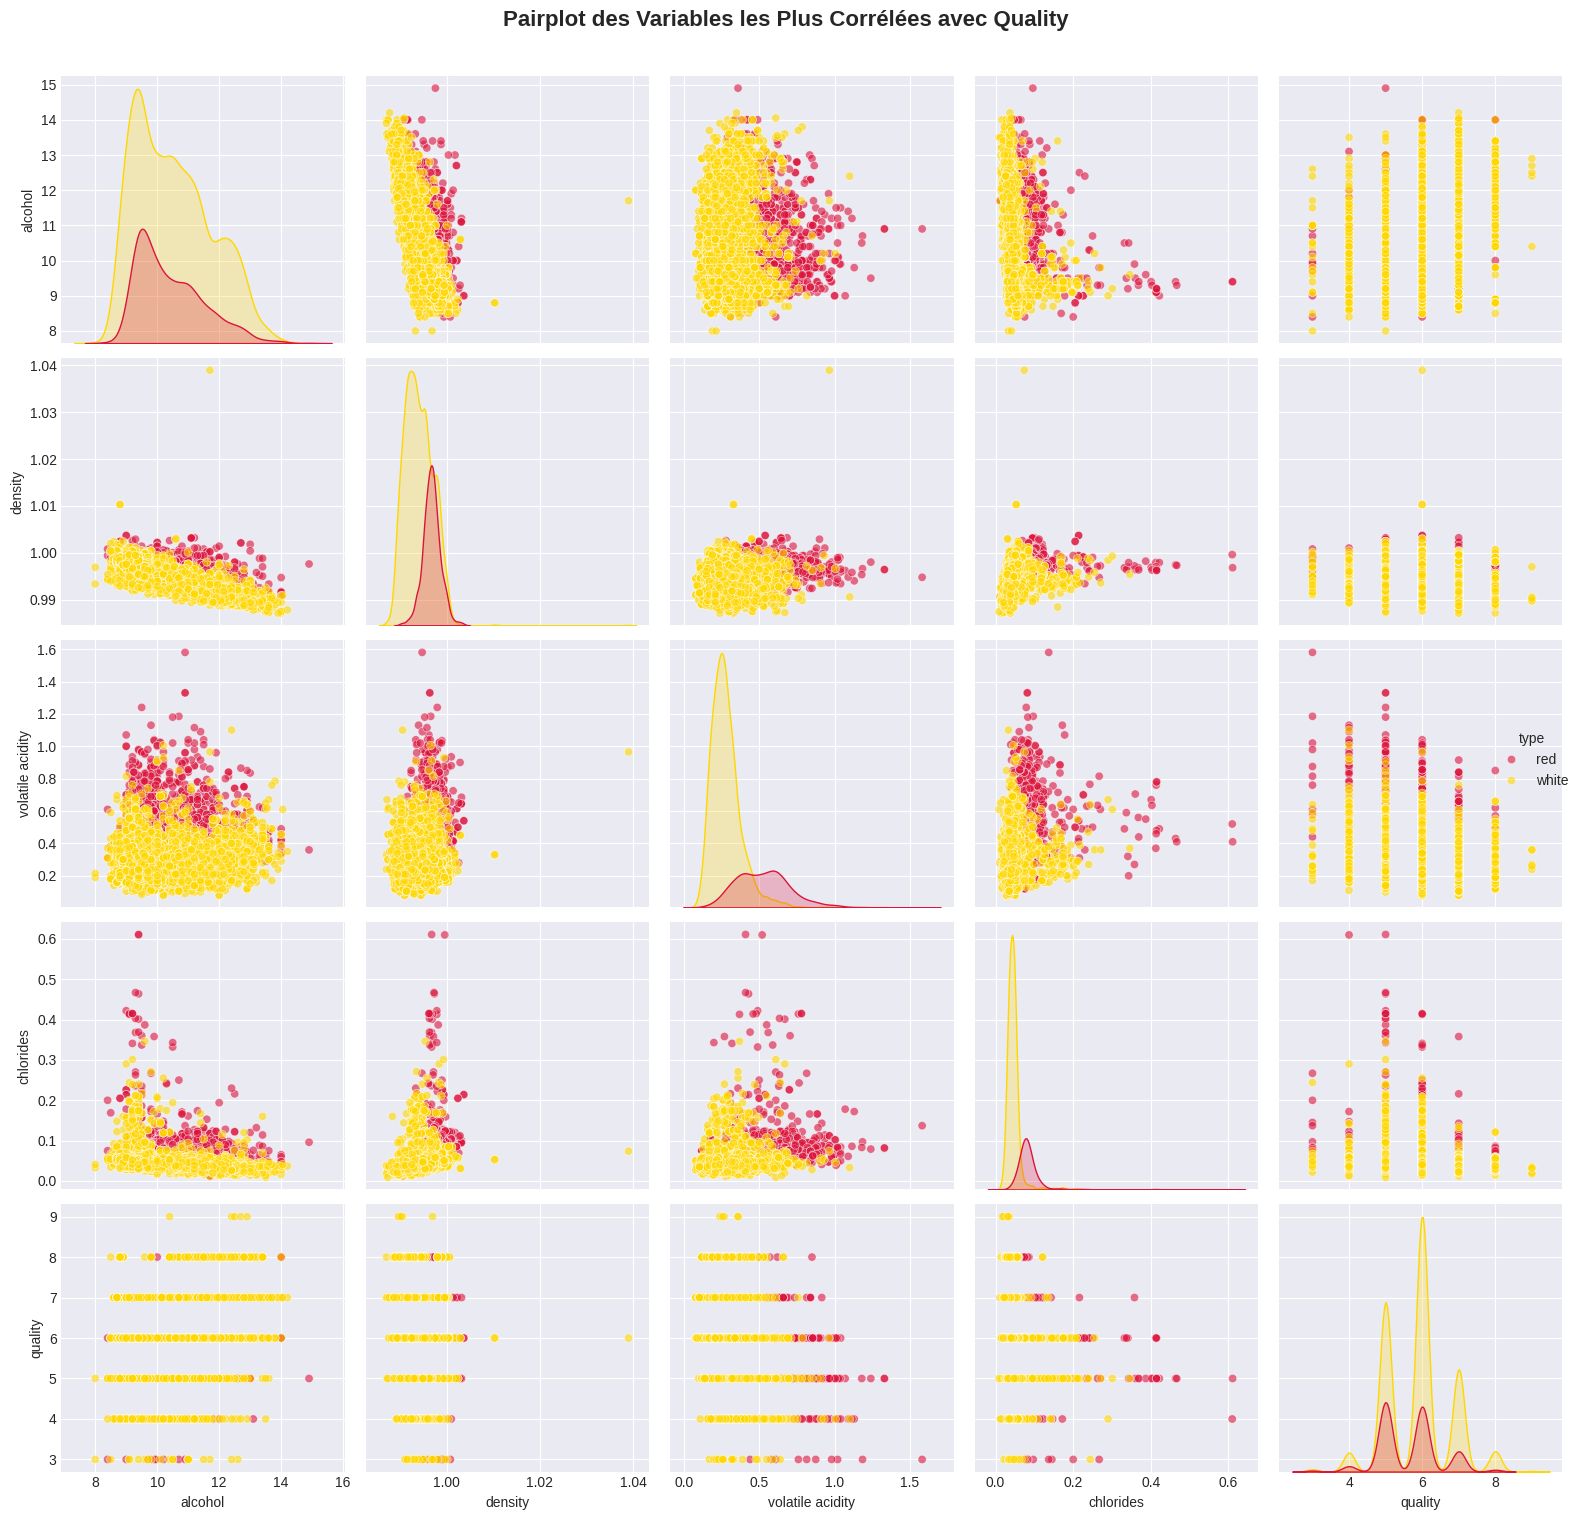


📌 Le pairplot permet de visualiser :
  - Les relations bivariées entre les variables
  - Les distributions de chaque variable
  - Les différences entre vins rouges et blancs


In [18]:
# Sélection des variables les plus corrélées avec quality
top_features = quality_corr.drop('quality').abs().sort_values(ascending=False).head(4).index.tolist()
top_features.append('quality')

print(f"Variables sélectionnées pour le pairplot : {top_features}")

# Création du pairplot
pairplot_data = wine_data[top_features + ['type']]

sns.pairplot(pairplot_data, hue='type', palette={'red': 'crimson', 'white': 'gold'},
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=3)

plt.suptitle('Pairplot des Variables les Plus Corrélées avec Quality', 
             y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📌 Le pairplot permet de visualiser :")
print("  - Les relations bivariées entre les variables")
print("  - Les distributions de chaque variable")
print("  - Les différences entre vins rouges et blancs")

## 7. Détection des valeurs aberrantes (Outliers)

Les outliers peuvent influencer les analyses. Utilisons la méthode IQR (Interquartile Range).

In [19]:
# Fonction pour détecter les outliers avec la méthode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyse des outliers pour toutes les variables numériques
print("=" * 80)
print("DÉTECTION DES OUTLIERS (MÉTHODE IQR)")
print("=" * 80)

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(wine_data, col)
    n_outliers = len(outliers)
    percent_outliers = (n_outliers / len(wine_data)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Nombre d\'outliers': n_outliers,
        'Pourcentage (%)': round(percent_outliers, 2),
        'Borne inférieure': round(lower, 2),
        'Borne supérieure': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Nombre d\'outliers', ascending=False)
display(outlier_df.style.background_gradient(cmap='Reds', subset=['Nombre d\'outliers', 'Pourcentage (%)']))

DÉTECTION DES OUTLIERS (MÉTHODE IQR)


,Variable,Nombre d'outliers,Pourcentage (%),Borne inférieure,Borne supérieure
2,citric acid,509,7.830000,0.040000,0.600000
1,volatile acidity,377,5.800000,-0.020000,0.660000
0,fixed acidity,357,5.490000,4.450000,9.650000
4,chlorides,286,4.400000,-0.000000,0.110000
11,quality,228,3.510000,3.500000,7.500000
9,sulphates,191,2.940000,0.180000,0.860000
3,residual sugar,118,1.820000,-7.650000,17.550000
8,pH,73,1.120000,2.800000,3.640000
5,free sulfur dioxide,62,0.950000,-19.000000,77.000000
6,total sulfur dioxide,10,0.150000,-41.500000,274.500000


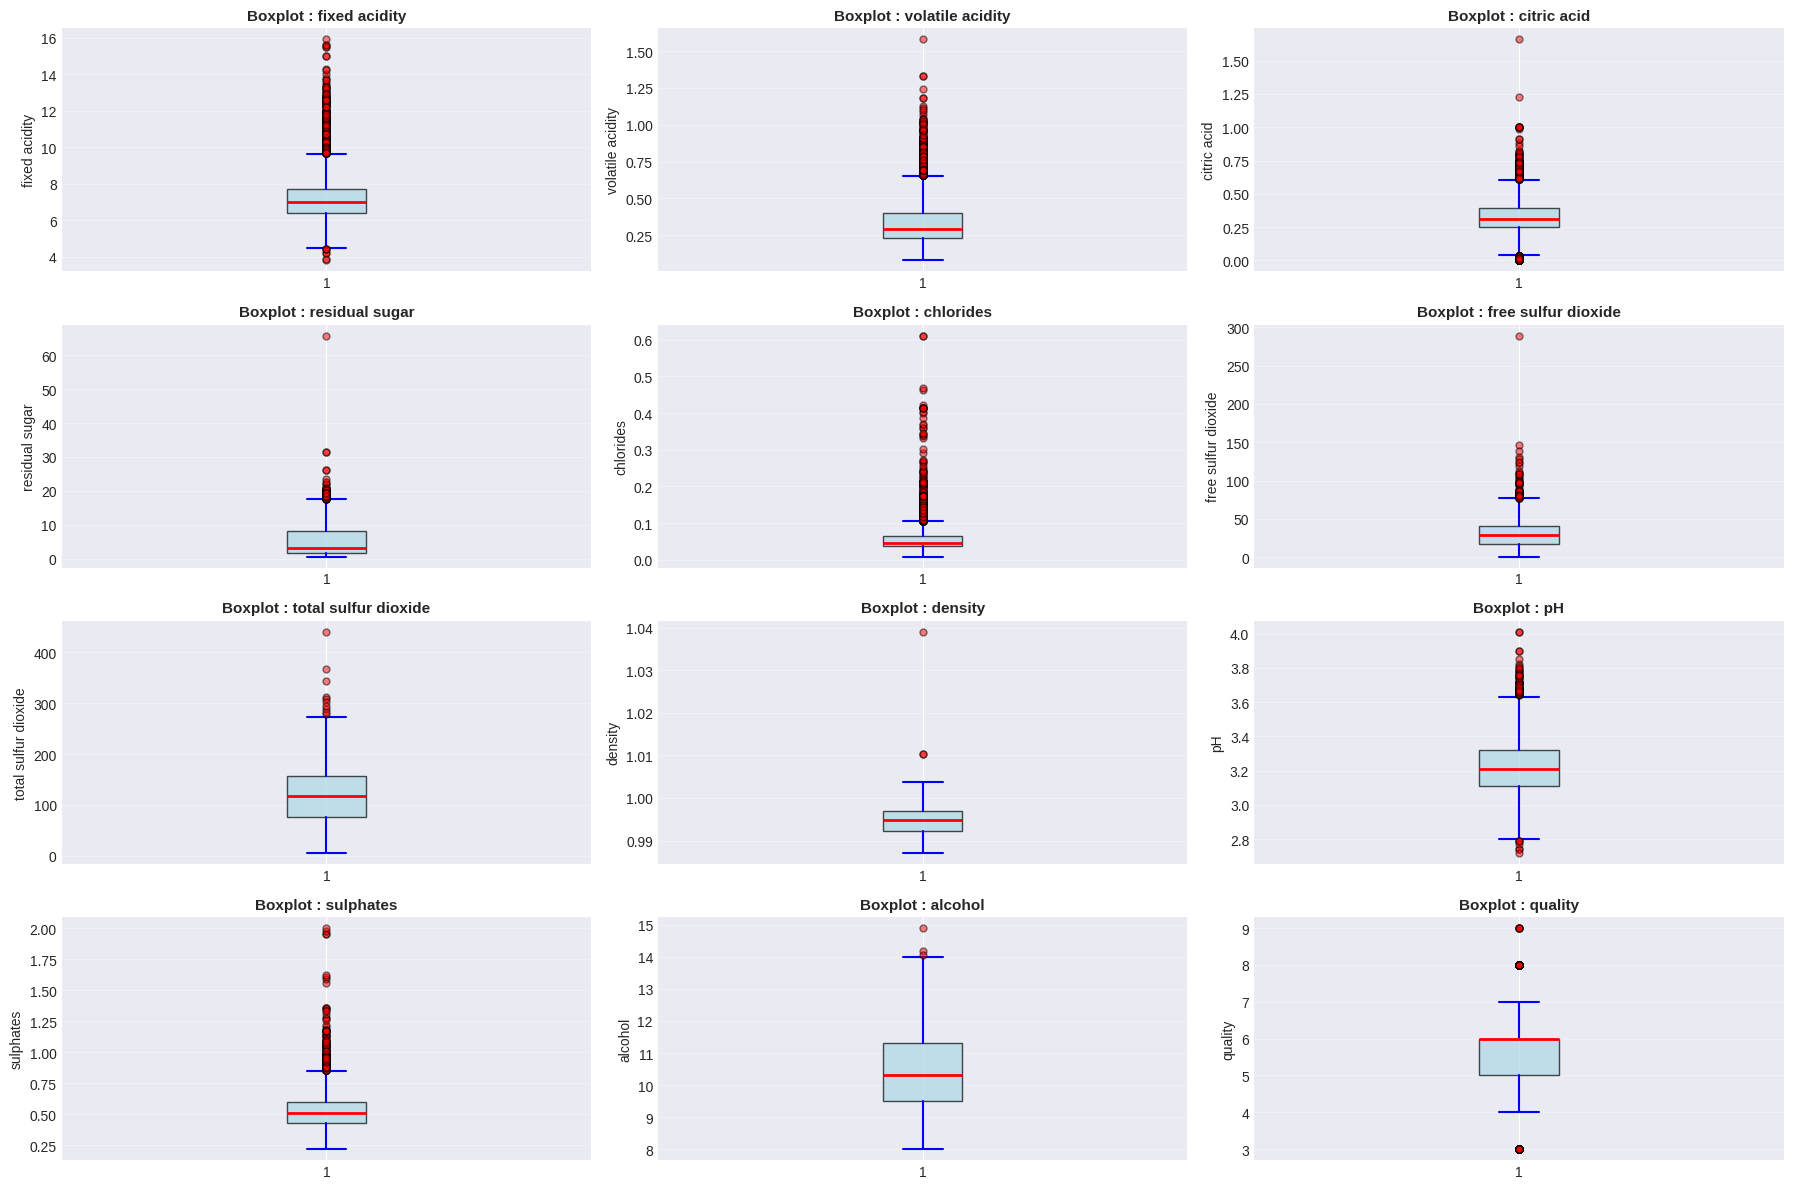


📌 Les boxplots permettent de visualiser :
  - La médiane (ligne rouge)
  - Les quartiles Q1 et Q3 (boîte)
  - Les valeurs aberrantes (points rouges)


In [20]:
# Visualisation des outliers avec boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(wine_data[col], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                          markersize=5, alpha=0.5))
    
    axes[idx].set_title(f'Boxplot : {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Masquer les axes non utilisés
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n📌 Les boxplots permettent de visualiser :")
print("  - La médiane (ligne rouge)")
print("  - Les quartiles Q1 et Q3 (boîte)")
print("  - Les valeurs aberrantes (points rouges)")

## 8. Analyse par catégorie de qualité

Regroupons les vins par catégories de qualité pour une analyse plus approfondie.

DISTRIBUTION PAR CATÉGORIE DE QUALITÉ


,Catégorie,Nombre,Pourcentage (%)
0,Moyenne,4974,76.56
1,Élevée,1277,19.66
2,Faible,246,3.79


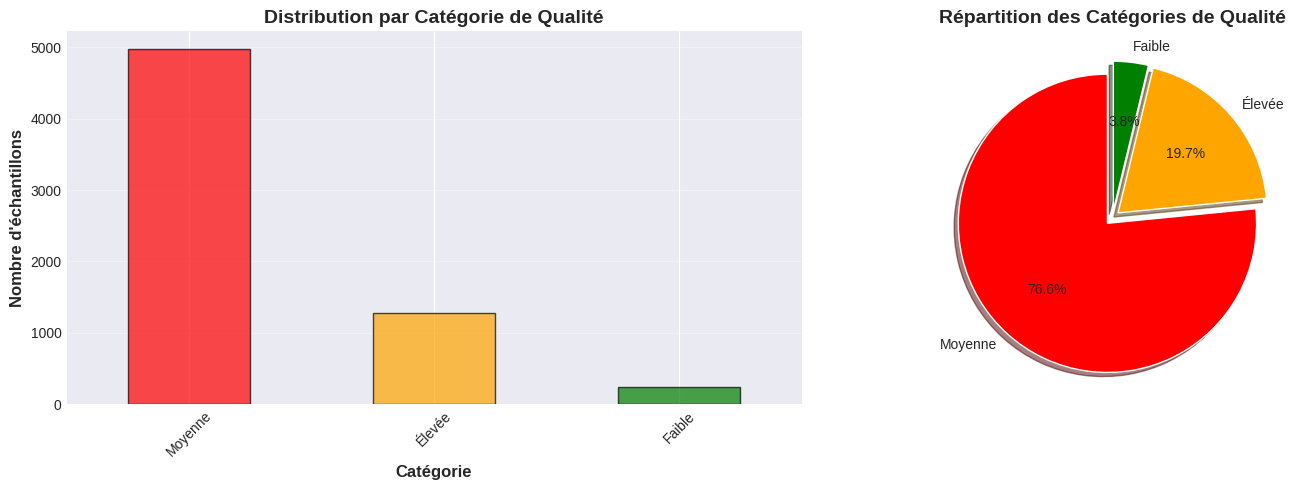

In [21]:
# Création de catégories de qualité
def categorize_quality(quality):
    if quality <= 4:
        return 'Faible'
    elif quality <= 6:
        return 'Moyenne'
    else:
        return 'Élevée'

wine_data['quality_category'] = wine_data['quality'].apply(categorize_quality)

# Distribution des catégories
print("=" * 80)
print("DISTRIBUTION PAR CATÉGORIE DE QUALITÉ")
print("=" * 80)

category_counts = wine_data['quality_category'].value_counts()
category_percent = (category_counts / len(wine_data) * 100).round(2)

category_df = pd.DataFrame({
    'Catégorie': category_counts.index,
    'Nombre': category_counts.values,
    'Pourcentage (%)': category_percent.values
})

display(category_df)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Diagramme en barres
category_counts.plot(kind='bar', ax=axes[0], color=['red', 'orange', 'green'],
                     edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution par Catégorie de Qualité', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Catégorie', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Diagramme circulaire
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            colors=['red', 'orange', 'green'], startangle=90, 
            explode=(0.05, 0.05, 0.05), shadow=True)
axes[1].set_title('Répartition des Catégories de Qualité', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 8.1 Comparaison des variables par catégorie de qualité

STATISTIQUES PAR CATÉGORIE DE QUALITÉ

Variable : ALCOHOL


,count,mean,std,min,25%,50%,75%,max
quality_category,,,,,,,,
Faible,246.000000,10.184350,0.999035,8.000000,9.400000,10.050000,10.900000,13.500000
Moyenne,4974.000000,10.265275,1.070626,8.000000,9.400000,10.000000,11.000000,14.900000
Élevée,1277.000000,11.433359,1.215620,8.500000,10.700000,11.500000,12.400000,14.200000



Variable : DENSITY


,count,mean,std,min,25%,50%,75%,max
quality_category,,,,,,,,
Faible,246.000000,0.994944,0.002532,0.989200,0.993105,0.995010,0.996800,1.001000
Moyenne,4974.000000,0.995113,0.002867,0.987220,0.992993,0.995400,0.997200,1.038980
Élevée,1277.000000,0.993027,0.003007,0.987110,0.990720,0.992280,0.995000,1.003200



Variable : VOLATILE ACIDITY


,count,mean,std,min,25%,50%,75%,max
quality_category,,,,,,,,
Faible,246.000000,0.465163,0.245677,0.110000,0.280000,0.380000,0.610000,1.580000
Moyenne,4974.000000,0.346423,0.165660,0.080000,0.230000,0.300000,0.420000,1.330000
Élevée,1277.000000,0.289170,0.116960,0.080000,0.200000,0.270000,0.340000,0.915000



Variable : CHLORIDES


,count,mean,std,min,25%,50%,75%,max
quality_category,,,,,,,,
Faible,246.000000,0.062126,0.049298,0.013000,0.040250,0.051000,0.068000,0.610000
Moyenne,4974.000000,0.058674,0.036437,0.009000,0.040000,0.049000,0.070000,0.611000
Élevée,1277.000000,0.044576,0.021014,0.012000,0.033000,0.039000,0.051000,0.358000


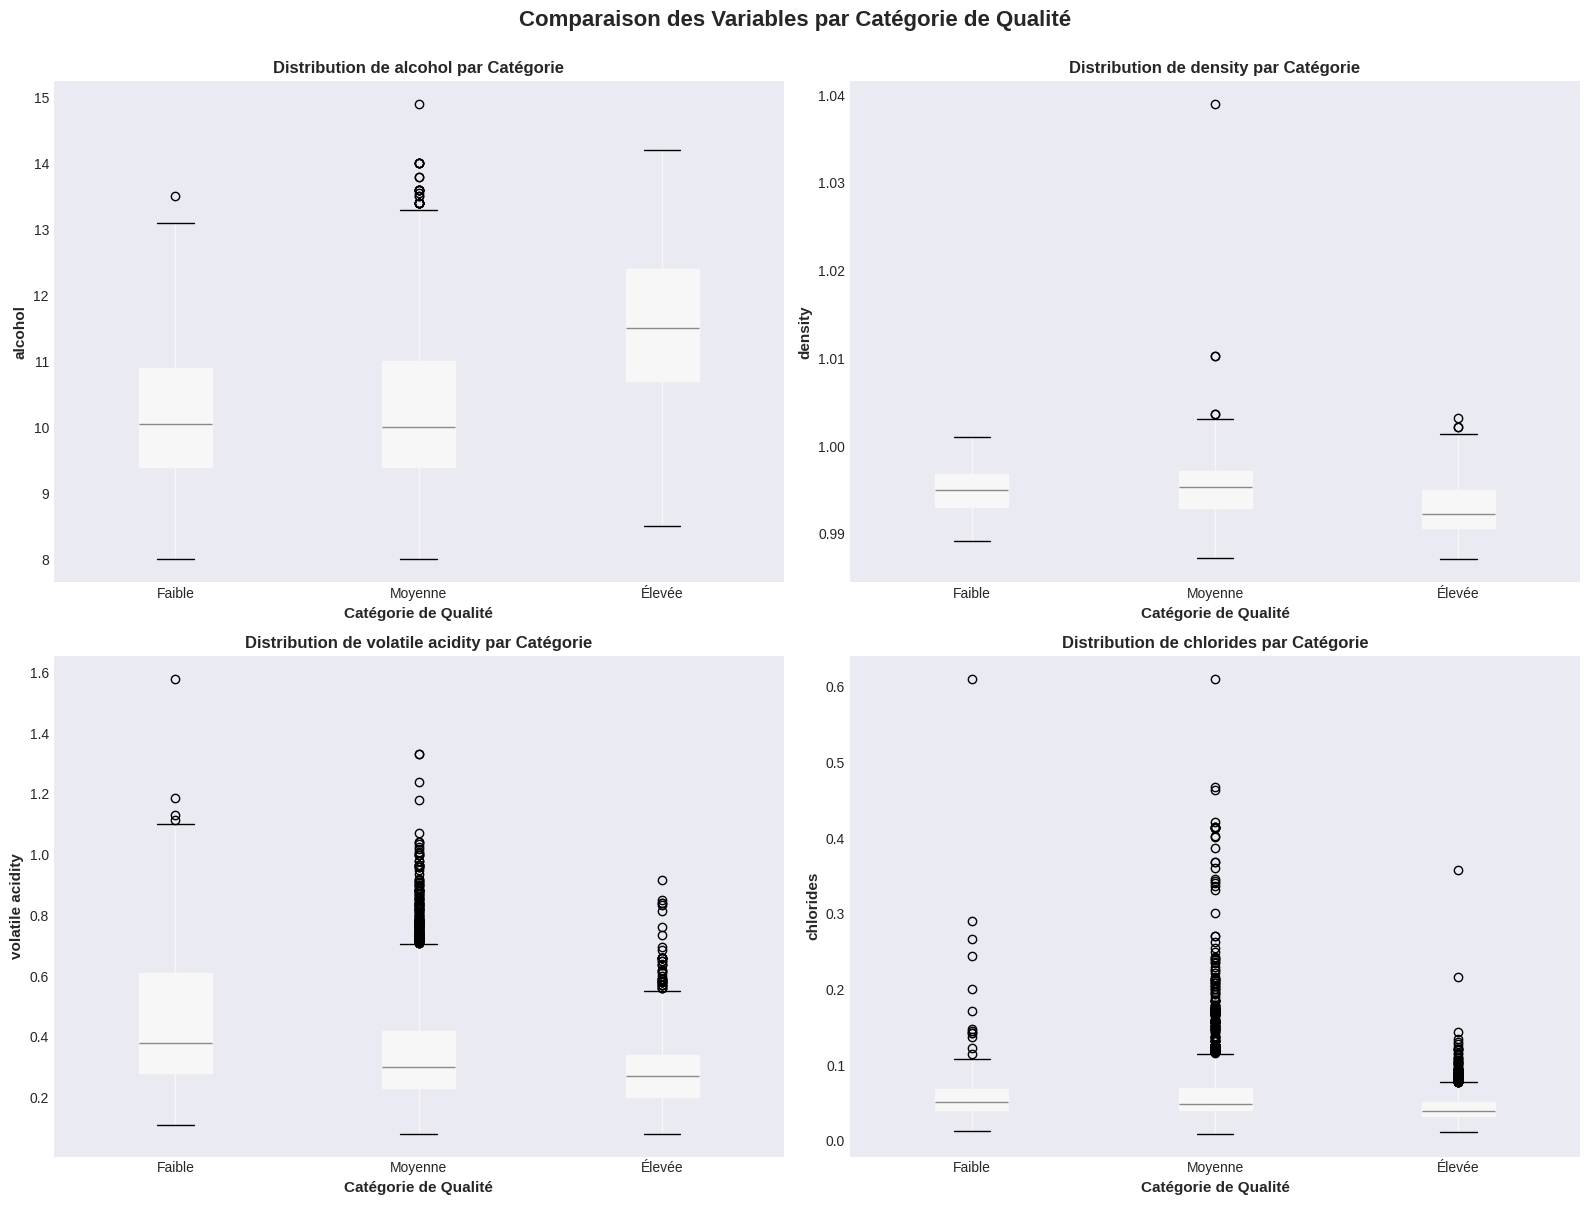

In [22]:
# Statistiques par catégorie de qualité
print("=" * 80)
print("STATISTIQUES PAR CATÉGORIE DE QUALITÉ")
print("=" * 80)

# Sélection de quelques variables importantes
key_vars = top_features[:-1]  # Variables les plus corrélées (sans quality)

for var in key_vars:
    print(f"\n{'='*80}")
    print(f"Variable : {var.upper()}")
    print(f"{'='*80}")
    
    stats_by_category = wine_data.groupby('quality_category')[var].describe()
    display(stats_by_category.style.background_gradient(cmap='YlGnBu'))

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, var in enumerate(key_vars[:4]):
    wine_data.boxplot(column=var, by='quality_category', ax=axes[idx],
                      patch_artist=True, grid=False)
    axes[idx].set_title(f'Distribution de {var} par Catégorie', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Catégorie de Qualité', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(var, fontsize=11, fontweight='bold')
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

plt.suptitle('Comparaison des Variables par Catégorie de Qualité', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 9. Synthèse et Conclusions de l'EDA

Résumons les principales découvertes de notre analyse exploratoire.

In [36]:
print("=" * 80)
print("SYNTHÈSE DE L'ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("=" * 80)

print("\n📊 STRUCTURE DU DATASET")
print("  " + "-" * 76)
print(f"  • Nombre total d'échantillons : {len(wine_data)}")
print(f"  • Vins rouges : {len(red_wine)} ({len(red_wine)/len(wine_data)*100:.1f}%)")
print(f"  • Vins blancs : {len(white_wine)} ({len(white_wine)/len(wine_data)*100:.1f}%)")
print(f"  • Nombre de variables : {wine_data.shape[1]}")
print(f"  • Valeurs manquantes : {wine_data.isnull().sum().sum()}")
print(f"  • Doublons : {wine_data.duplicated().sum()}")
print("\n🎯 VARIABLE CIBLE (QUALITY)")
print("  " + "-" * 76)
print(f"  • Score moyen : {wine_data['quality'].mean():.2f}")
print(f"  • Médiane : {wine_data['quality'].median():.0f}")
print(f"  • Écart-type : {wine_data['quality'].std():.2f}")
print(f"  • Plage : [{wine_data['quality'].min():.0f} - {wine_data['quality'].max():.0f}]")
print(f"  • Distribution : Majoritairement concentrée autour de 5-6")
print("\n🔍 CORRÉLATIONS AVEC LA QUALITÉ")
print("  " + "-" * 76)
top_positive = quality_corr.drop('quality').nlargest(3)
top_negative = quality_corr.drop('quality').nsmallest(3)
print("  Variables avec corrélation positive :")
for var, corr in top_positive.items():
    print(f"    • {var:25s} : +{corr:.4f}")
print("\n  Variables avec corrélation négative :")
for var, corr in top_negative.items():
    print(f"    • {var:25s} : {corr:.4f}")
"""print("\n⚠️  VALEURS ABERRANTES (OUTLIERS)")
print("  " + "-" * 76)
top_outliers = outlier_df.nlargest(5, 'Nombre doutliers')
for _, row in top_outliers.iterrows():
    print(f"  • {row['Variable']:25s} : {row['Nombre doutliers']} outliers ({row['Pourcentage (%)']}%)")
"""
print("\n📈 DISTRIBUTIONS")
print("  " + "-" * 76)
high_skew = skew_kurt_df[abs(skew_kurt_df['Skewness']) > 1]
if len(high_skew) > 0:
    print("  Variables avec forte asymétrie (|skewness| > 1) :")
    for _, row in high_skew.head(5).iterrows():
        direction = "droite" if row['Skewness'] > 0 else "gauche"
        print(f"    • {row['Variable']:25s} : skew = {row['Skewness']:+.2f} (asymétrie à {direction})")
else:
    print("  • Aucune variable avec forte asymétrie détectée")
print("\n💡 RECOMMANDATIONS POUR LA SUITE")
print("  " + "-" * 76)
print("  1. Envisager la transformation des variables avec forte asymétrie (log, sqrt)")
print("  2. Traiter ou analyser l'impact des outliers sur les modèles")
print("  3. Créer des features composites basées sur les corrélations")
print("  4. Tester différentes stratégies d'encoding pour 'type'")
print("  5. Considérer la création de catégories de qualité pour une classification")
print("\n" + "=" * 80)
print("✓ ANALYSE EXPLORATOIRE TERMINÉE")
print("=" * 80)


SYNTHÈSE DE L'ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

📊 STRUCTURE DU DATASET
  ----------------------------------------------------------------------------
  • Nombre total d'échantillons : 6497
  • Vins rouges : 1599 (24.6%)
  • Vins blancs : 4898 (75.4%)
  • Nombre de variables : 14
  • Valeurs manquantes : 0
  • Doublons : 1177

🎯 VARIABLE CIBLE (QUALITY)
  ----------------------------------------------------------------------------
  • Score moyen : 5.82
  • Médiane : 6
  • Écart-type : 0.87
  • Plage : [3 - 9]
  • Distribution : Majoritairement concentrée autour de 5-6

🔍 CORRÉLATIONS AVEC LA QUALITÉ
  ----------------------------------------------------------------------------
  Variables avec corrélation positive :
    • alcohol                   : +0.4443
    • citric acid               : +0.0855
    • free sulfur dioxide       : +0.0555

  Variables avec corrélation négative :
    • density                   : -0.3059
    • volatile acidity          : -0.2657
    • chlorides  